In [1]:
import numpy as np

from error_generators import *

# testing if the algebra is semisimple

Given a basis $\{X_i\}_i$ for our lie algebra, we construct the structure coefficients:
$$ [X_a, X_b] = f_{ab}^c X_c$$

We then define a basis for the adjoint representation (note, there are two "adjoints:" conjugations and commutators, in this case, we refer to commutators, or the "small adjoint representation" as opposed to the big adjoint representation we look at when we define a matrix that represetns $M G M^{-1}$ where $G$ is an element of the group):
$$ (T_a)_{bc} = f_{ab}^c $$
This in turn allows us to construct \textbf{Cartan's metric tensor}
$$ g_{ab} = - f_{am}^n f_{bn}^m = \text{tr}(T_a T_b). $$
The algebra is semisimple if and only if
$$ \text{det} g_{ab} \neq 0 $$

In [71]:
egen = ErrorGen(2)
fvec = np.array(egen.features)
dvec = np.array(egen.dual_features)

/home/jpmarceaux/PycharmProjects/AnalyticErrorAnalysis/venv/lib/python3.10/site-packages/pygsti/modelmembers/operations/lindbladerrorgen.py:1691: UserWarning: Using 'CPTP' as a Lindblad type is deprecated, and you should now use 'CPTPLND'
  _warnings.warn("Using 'CPTP' as a Lindblad type is deprecated, and you should now use 'CPTPLND'")


In [72]:
# calculate the commutators
# only need to calculate the lower triangle of the matrix
comms = np.zeros((len(fvec), len(fvec), *fvec[0].shape))
for i in range(len(fvec)):
    for j in range(0, i):
        commutator = fvec[i]@fvec[j] - fvec[j]@fvec[i]
        comms[i, j, :, :] = commutator
        comms[j, i, :, :] = -commutator

In [73]:
structure_coefs = np.einsum('aij,bcji->bca', dvec, comms)

In [74]:
# # uncomment to check my einsum
# svec = np.zeros((len(fvec), len(fvec), len(fvec)))
# for i in range(len(fvec)):
#     for j in range(len(fvec)):
#         commutator = fvec[i] @ fvec[j] - fvec[j] @ fvec[i]
#         for k in range(len(fvec)):
#             svec[i, j, k] = np.trace(dvec[k] @ commutator)
# assert np.all(svec == structure_coefs)

In [75]:
cartan_metric = np.einsum('amn,bnm->ab', structure_coefs, structure_coefs)

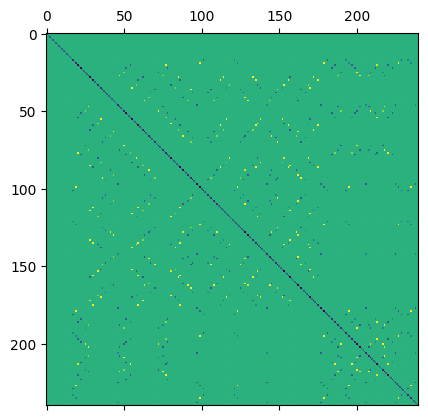

In [76]:
plt.matshow(cartan_metric)

In [77]:
np.linalg.det(cartan_metric)

/home/jpmarceaux/PycharmProjects/AnalyticErrorAnalysis/venv/lib/python3.10/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


inf

So, it looks like the algebra has an affine subgroup, which I think corresponds to depolarizing error that is $S_X + S_Y + S_Z$

In [81]:
np.linalg.eigvals(cartan_metric)

array([  256.        +0.00000000e+00j, -7108.18974427+0.00000000e+00j,
       -7108.18974427+0.00000000e+00j, -7108.18974427+0.00000000e+00j,
       -7108.18974427+0.00000000e+00j, -7108.18974427+0.00000000e+00j,
        -464.        +0.00000000e+00j, -7108.18974427+0.00000000e+00j,
       -7108.18974427+0.00000000e+00j,  -464.        +0.00000000e+00j,
        -464.        +0.00000000e+00j,   228.18974427+0.00000000e+00j,
        -928.        +0.00000000e+00j,  -928.        +0.00000000e+00j,
        -464.        +0.00000000e+00j,  -464.        +0.00000000e+00j,
        -464.        +0.00000000e+00j,  -464.        +0.00000000e+00j,
         228.18974427+0.00000000e+00j,   228.18974427+0.00000000e+00j,
         228.18974427+1.99964451e-13j,   228.18974427-1.99964451e-13j,
         228.18974427+0.00000000e+00j,   228.18974427+0.00000000e+00j,
        -992.        +0.00000000e+00j,  -992.        +0.00000000e+00j,
        -992.        +0.00000000e+00j, -7108.18974427+0.00000000e+00j,
      